In [ ]:
!pip install gymnasium

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 6.5 MB/s eta 0:00:00


In [ ]:
import gymnasium as gym
import numpy as np
import time
from IPython import display

In [ ]:
env = gym.make('FrozenLake-v1', render_mode="ansi")

In [ ]:
env.P[0][3] # Transition model

/usr/local/lib/python3.10/dist-packages/gymnasium/core.py:311: UserWarning: WARN: env.P to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.P` for environment variables or `env.get_wrapper_attr('P')` that will search the reminding wrappers.
  logger.warn(


[(0.3333333333333333, 1, 0.0, False),
 (0.3333333333333333, 0, 0.0, False),
 (0.3333333333333333, 0, 0.0, False)]

In [ ]:
env.observation_space.n

16

In [ ]:
env.action_space.n

4

In [ ]:
def play(env, policy, render=False):
    state, _ = env.reset()
    total_reward = 0
    steps = 0
    done = False
    while not done:
        action = policy[state]
        next_state, reward, done, info, _ = env.step(action)
        total_reward += reward
        steps += 1
        if render:
            print(env.render())
            time.sleep(0.5)
            if not done:
                display.clear_output(wait=True)
        state = next_state

    return (total_reward, steps)

In [ ]:
policy_0 = np.asarray([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
play(env, policy_0)

(0.0, 4)

In [ ]:

policy_0 = np.asarray([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
play(env, policy_0, True)


  (Left)
SFFF
FHFH
FFFH
HFFG



(0.0, 21)

In [ ]:
policy_1 = np.asarray([0, 1, 1, 3, 1, 0, 2, 0, 1, 1, 2, 2, 3, 3, 1, 0])
play(env, policy_1, True)

  (Down)
SFFF
FHFH
FFFH
HFFG



(0.0, 6)

In [ ]:
policy_2 = np.array([1, 1, 1, 3, 0, 1, 2, 3, 1, 1, 2, 3, 2, 2, 1, 3])
play(env, policy_2, True)

  (Down)
SFFF
FHFH
FFFH
HFFG



(0.0, 4)

In [ ]:
policy_3 = np.array([0, 3, 0, 3, 0, 0, 0, 0, 3, 1, 0, 0, 0, 2, 1, 0])
play(env, policy_3, True)

  (Down)
SFFF
FHFH
FFFH
HFFG



(1.0, 109)

In [ ]:
def play_multiple_times(env, policy, max_episodes):
    success = 0
    list_of_steps = []
    for i in range(max_episodes):
        total_reward, steps = play(env, policy)

        if total_reward > 0:
            success += 1
            list_of_steps.append(steps)

    print(f'Number of successes: {success}/{max_episodes}')
    print(f'Average number of steps: {np.mean(list_of_steps)}')
    return success/max_episodes

In [ ]:
policy_0 = np.asarray([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
play_multiple_times(env, policy_0, 1000)

Number of successes: 0/1000
Average number of steps: nan


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


0.0

In [ ]:
policy_1 = np.asarray([0, 1, 1, 3, 1, 0, 2, 0, 1, 1, 2, 2, 3, 3, 1, 0])
play_multiple_times(env, policy_1, 1000)

Number of successes: 67/1000
Average number of steps: 11.164179104477611


0.067

In [ ]:
policy_2 = np.array([1, 1, 1, 3, 0, 1, 2, 3, 1, 1, 2, 3, 2, 2, 1, 3])
play_multiple_times(env, policy_2, 1000)

Number of successes: 119/1000
Average number of steps: 15.445378151260504


0.119

In [ ]:
policy_3 = np.array([0, 3, 0, 3, 0, 0, 0, 0, 3, 1, 0, 0, 0, 2, 1, 0])
play_multiple_times(env, policy_3, 1000)

Number of successes: 767/1000
Average number of steps: 43.36505867014342


0.767

In [ ]:
def policy_evaluation(env, policy, max_iters=500, gamma=0.9):
    # Initialize the values of all states to be 0
    v_values = np.zeros(env.observation_space.n)

    for i in range(max_iters):
        prev_v_values = np.copy(v_values)

        # Update the value of each state
        for state in range(env.observation_space.n):
            action = policy[state]

            # Compute the q-value of the action
            q_value = 0
            for prob, next_state, reward, done in env.P[state][action]:
                q_value += prob * (reward + gamma * prev_v_values[next_state])

            v_values[state] = q_value # update v-value

        # Check convergence
        if np.all(np.isclose(v_values, prev_v_values)):
            #print(f'Converged at {i}-th iteration.')
            break

    return v_values

In [ ]:
policy_0 = np.asarray([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
v_values_0 = policy_evaluation(env, policy_0)
print(v_values_0)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
policy_1 = np.asarray([0, 1, 1, 3, 1, 0, 2, 0, 1, 1, 2, 2, 3, 3, 1, 0])
v_values_1 = policy_evaluation(env, policy_1)
print(v_values_1)

[0.01904157 0.01519815 0.03161906 0.02371389 0.02538879 0.
 0.06648515 0.         0.05924054 0.13822794 0.18999823 0.
 0.         0.21152109 0.56684236 0.        ]


In [ ]:
np.all(v_values_1 >= v_values_0)

True

In [ ]:
policy_2 = np.array([1, 1, 1, 3, 0, 1, 2, 3, 1, 1, 2, 3, 2, 2, 1, 3])
v_values_2 = policy_evaluation(env, policy_2)
print(v_values_2)

[0.02889625 0.01951972 0.03616977 0.0271268  0.04790519 0.
 0.07391985 0.         0.08288277 0.19339319 0.21022995 0.
 0.         0.35153135 0.62684674 0.        ]


In [ ]:
np.all(v_values_2 >= v_values_1)

True

In [ ]:
policy_3 = np.array([0, 3, 0, 3, 0, 0, 0, 0, 3, 1, 0, 0, 0, 2, 1, 0])
v_values_3 = policy_evaluation(env, policy_3)
print(v_values_3)

[0.06888666 0.06141097 0.07440714 0.05580443 0.09185068 0.
 0.11220679 0.         0.14543323 0.24749485 0.29961611 0.
 0.         0.37993438 0.63901935 0.        ]


In [ ]:
np.all(v_values_3 >= v_values_2)

True

In [ ]:
def value_iteration(env, max_iters=500, gamma=0.9):
    # initialize
    converged=0
    v_values = np.zeros(env.observation_space.n)

    for i in range(max_iters):
        prev_v_values = np.copy(v_values)

        # update the v-value for each state
        for state in range(env.observation_space.n):
            q_values = []

            # compute the q-value for each action that we can perform at the state
            for action in range(env.action_space.n):
                q_value = 0
                # loop through each possible outcome
                for prob, next_state, reward, done in env.P[state][action]:
                    q_value += prob * (reward + gamma * prev_v_values[next_state])

                q_values.append(q_value)

            # select the max q-values
            best_action = np.argmax(q_values)
            v_values[state] = q_values[best_action]

        # check convergence
        if np.all(np.isclose(v_values, prev_v_values)):
            converged=i
            print(f'Converged at {i}-th iteration.')
            break

    return v_values, converged

In [ ]:
optimal_v_values,_ = value_iteration(env, max_iters=500, gamma=0.9)

Converged at 79-th iteration.


In [ ]:
optimal_v_values

array([0.06888615, 0.06141054, 0.07440682, 0.05580409, 0.09185022,
       0.        , 0.11220663, 0.        , 0.14543286, 0.2474946 ,
       0.29961593, 0.        , 0.        , 0.3799342 , 0.63901926,
       0.        ])

In [ ]:
def policy_extraction(env, v_values, gamma=0.9):
    # initialize
    policy = np.zeros(env.observation_space.n, dtype=np.int32)

    # loop through each state in the environment
    for state in range(env.observation_space.n):
        q_values = []
        # loop through each action
        for action in range(env.action_space.n):
            q_value = 0
            # loop each possible outcome
            for prob, next_state, reward, done in env.P[state][action]:
                q_value += prob * (reward + gamma * v_values[next_state])

            q_values.append(q_value)

        # select the best action
        best_action = np.argmax(q_values)
        policy[state] = best_action

    return policy

In [ ]:
optimal_policy = policy_extraction(env, optimal_v_values, gamma=0.9)

In [ ]:
optimal_policy

array([0, 3, 0, 3, 0, 0, 0, 0, 3, 1, 0, 0, 0, 2, 1, 0], dtype=int32)

In [ ]:
play(env, optimal_policy, True)

  (Down)
SFFF
FHFH
FFFH
HFFG



(1.0, 34)

In [ ]:
play_multiple_times(env, optimal_policy, 1000)

Number of successes: 785/1000
Average number of steps: 42.94522292993631


0.785

# Policy_iteration

In [ ]:
def policy_iteration(env, max_iters=500, gamma=0.9):
    # initialize
    converged=0
    policy = np.zeros(env.observation_space.n, dtype=np.int32)

    for i in range(max_iters):
        prev_policy = np.copy(policy)

        # policy evaluation
        v_values = policy_evaluation(env, policy, max_iters=max_iters, gamma=gamma)

        # policy improvement
        policy = policy_extraction(env, v_values, gamma=gamma)

        # Check convergence
        if np.all(np.isclose(policy, prev_policy)):
            converged=i
            print(f'Converged at {i}-th iteration.')
            break

    return policy, converged

In [ ]:
runtimes1 = []
winrates1 = []
converged1 = []

runtimes = []
winrates = []
converged = []


# START

**ENV1: FrozenLake-v1**

In [ ]:
print("Value_iteration_FrozenLake-v1")
start=time.time()
optimal_v_values1,i=value_iteration(env)
optimal_policy1=policy_extraction(env, optimal_v_values1, gamma=0.9)
end=time.time()
print('Time: ',end-start)
winrate=play_multiple_times(env, optimal_policy1, 1000)
runtimes1.append(end-start)
winrates1.append(winrate)
converged1.append(i)

print("")
print("")

print("Policy_iteration_FrozenLake-v1")
start=time.time()
policy_iter1,i=policy_iteration(env)
end=time.time()
print('Time: ',end-start)
winrate=play_multiple_times(env, policy_iter1, 1000)
runtimes.append(end-start)
winrates.append(winrate)
converged.append(i)

**ENV2: FrozenLake8x8-v1**

In [ ]:
env2 = gym.make('FrozenLake8x8-v1')

In [ ]:
print("Value_iteration_FrozenLake8x8-v1")
start=time.time()
optimal_v_values2,i=value_iteration(env2)
optimal_policy2=policy_extraction(env2, optimal_v_values2, gamma=0.9)
end=time.time()
print('Time: ',end-start)
winrate=play_multiple_times(env2, optimal_policy2, 1000)
runtimes1.append(end-start)
winrates1.append(winrate)
converged1.append(i)

print("")
print("")

print("Policy_iteration_FrozenLake8x8-v1")
start=time.time()
policy_iter2,i=policy_iteration(env2)
end=time.time()
print('Time: ',end-start)
winrate=play_multiple_times(env2, policy_iter2, 1000)
runtimes.append(end-start)
winrates.append(winrate)
converged.append(i)

**ENV3: Taxi-v3**

In [ ]:
env3 = gym.make('Taxi-v3')

In [ ]:
print("Value_iteration_Taxi-v3")
start=time.time()
optimal_v_values3,i=value_iteration(env3)
optimal_policy3=policy_extraction(env3, optimal_v_values3, gamma=0.9)
end=time.time()
print('Time: ',end-start)
winrate=play_multiple_times(env3, optimal_policy3, 1000)
runtimes1.append(end-start)
winrates1.append(winrate)
converged1.append(i)

print("")
print("")

print("Policy_iteration_Taxi-v3")
start=time.time()
policy_iter3,i=policy_iteration(env3)
end=time.time()
print('Time: ',end-start)
winrate=play_multiple_times(env3, policy_iter3, 1000)
runtimes.append(end-start)
winrates.append(winrate)
converged.append(i)

 # Plot và nhận xét

In [ ]:
import pandas as  pd

In [ ]:
runtime_df = pd.DataFrame([runtimes1,runtimes], columns=['FrozenLake-v0', 'FrozenLake8x8-v0', 'taxi-v3'],
                          index=['Value Iteration', 'Policy Iteration'])
winrate_df = pd.DataFrame([winrates1,winrates], columns=['FrozenLake-v0', 'FrozenLake8x8-v0', 'taxi-v3'],
                          index=['Value Iteration', 'Policy Iteration'])
converged_df = pd.DataFrame([converged1,converged], columns=['FrozenLake-v0', 'FrozenLake8x8-v0', 'taxi-v3'],
                          index=['Value Iteration', 'Policy Iteration'])
runtime_df.columns = pd.MultiIndex.from_product([['RUNTIME'], runtime_df.columns.tolist()])
winrate_df.columns = pd.MultiIndex.from_product([['WINRATE'], winrate_df.columns.tolist()])
converged_df.columns = pd.MultiIndex.from_product([['CONVERGED AT (iter)'], converged_df.columns.tolist()])

display.display(runtime_df)
print("\n-----------------------------------------------------------")
display.display(winrate_df)
print("\n-----------------------------------------------------------")
display.display(converged_df)

# Nhận xét




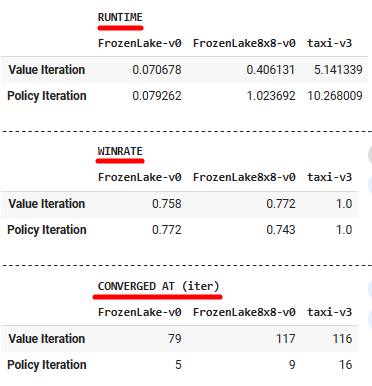

**1. Thời Gian Chạy (RUNTIME):**
- Trong cả ba trò chơi, Policy Iteration mất nhiều thời gian hơn so với Value Iteration. Điều này do:
  + Policy Iteration đòi hỏi hai bước lặp chính: đánh giá chiến lược *(policy_evalution)* và cải tiến chiến lược *(policy_improvement)*, trong đó đánh giá chiến lược có thể rất tốn thời gian, đặc biệt khi phải đảm bảo chiến lược ổn định trước khi chuyển sang cải tiến chiến lược.
  + Value Iteration chỉ tập trung vào việc cập nhật *state-value function*.


**2. Tỷ Lệ Thắng (WINRATE):** Tỷ lệ thắng vẫn ở mức cao và gần như là tương đồng giữa Policy Iteration và Value Iteration

**3. Số Lần Lặp Để Hội Tụ (CONVERGED AT):**
Dù Policy Iteration mất nhiều thời gian hơn để chạy, nó lại cần ít lần lặp hơn để hội tụ so với Value Iteration.